In [37]:
library('tidyverse')
library('patchwork')
library('nycflights13')
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

Use filter to make a table with just flights weather data from January.

In [38]:
weather |> head()

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


In [39]:
weather_jan = filter(weather, month ==1)         

Do the same for June.

In [40]:
weather_june = filter(weather, month ==6)

Use `filter` and `summarize` to produce two single row tables. One that has the median `temp` for January, and one that has the median `temp` for June.

In [21]:
median.jan  = weather |> 
     group_by(month) |>
     filter(month == 1) |> 
     summarize(median.temp = median(temp))

median.june  = weather |> 
     group_by(month) |>
     filter(month == 6) |> 
     summarize(median.temp = median(temp))

In [22]:
median.jan

month,median.temp
<int>,<dbl>
1,37.04


In [24]:
median.june

month,median.temp
<int>,<dbl>
6,71.96


ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (1): yintercept

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr

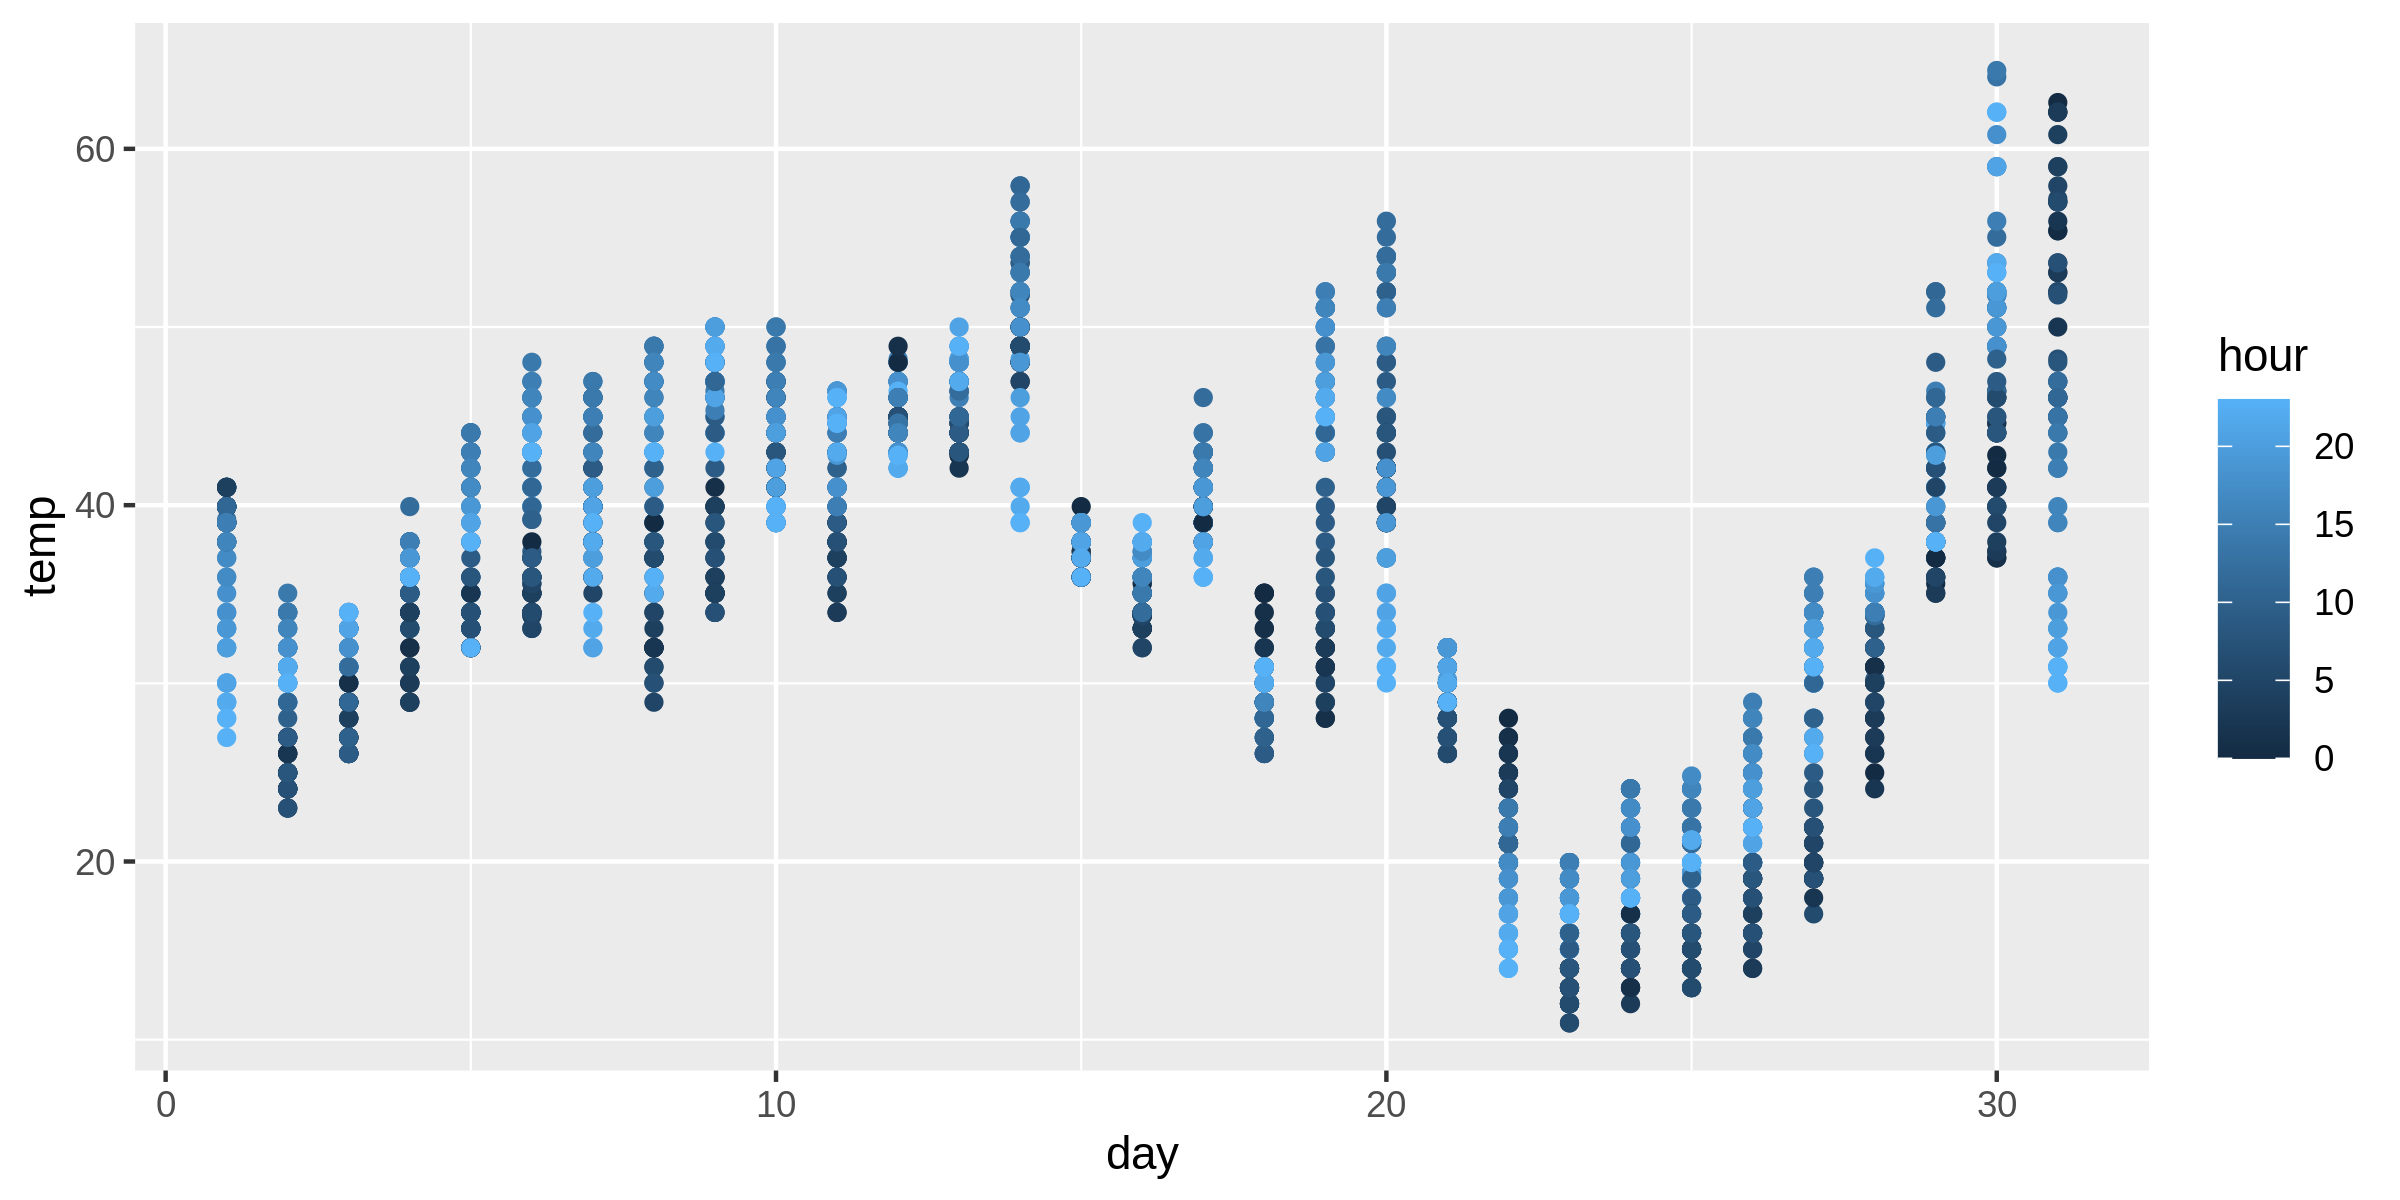

In [36]:
#jan weather 
    p = ggplot(weather_jan, aes(x = day, y = temp, color = hour)) + 
    geom_point(position = position_jitter(height = 0, width = 0.2)) + 
    scale_color_virdis_c()
    p + geom_hline(data = median.jan, mapping = aes(yintercept = median.jan))
p

In [ ]:
    # add median line acrosss the graph 




In [ ]:
p.cty = p
 p.hwy = p.hwy + theme(legend.position = 'none')

 p.hwy + p.cty

p

Re-create the following figure.

<img src="./example.png" style="width: 800px;" />

- Use `geom_hline` for the median line.
- Use `scale_color_viridis_c` to set the color scale.
- This chart can be made by facetting or each plot can be created by itself and combined with `patchwork`. For this example use `patchwork`.
- Use `ylim` to make the y-axis for each plot the same. 